In [1]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [2]:
cell_path1 = './datas/321/Tcell_raw_counts02_v2.h5ad'
folder_path1 = './datas/321/'
radius1 = 0
c1 =0
epoches1 =  50
epoches2 =  10
contin = False
resolution=2
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
ms = False


In [3]:
adata = sc.read_h5ad(cell_path1)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/Sample name' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/Sample name' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/Diagnosis' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/Diagnosis' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/meth

AnnData object with n_obs × n_vars = 38633 × 33538
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'S_score', 'G2M_score', 'phase', 'productive', 'annotation', 'Gender'
    var: 'gene_ids', 'feature_types'

In [4]:
t=list(adata.obs['annotation'].unique())
t.remove('NK cell')
t.remove('NK T cell')
t.remove('LTi-like NCR- ILC3')
t.remove('LTi-like NCR+ ILC3')
t = ['gdT','TRGV2 gdT','TRGV4 gdT','TRGV5/7 gdT','TRDV2/TRGV9 gdT']
adata = adata[adata.obs[adata.obs['annotation'].isin(t)].index]

In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


AnnData object with n_obs × n_vars = 4201 × 16562
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'S_score', 'G2M_score', 'phase', 'productive', 'annotation', 'Gender'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'log1p'

In [6]:
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata.raw = adata
adata._inplace_subset_var(adata.var['highly_variable'])
adata.to_df()

,HES4,ISG15,TNFRSF18,FO704657.1,CALML6,CHD5,Z98884.1,TNFRSF9,AL096855.1,AL139424.3,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL354822.1
AAACCTGAGGAGTTTA-1-4918STDY7333456,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.657428,3.083581,2.657428,0.000000,1.062717,0.000000,2.657428,0.0,0.0
AAACGGGAGGCGATAC-1-4918STDY7333456,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.976708,3.114586,3.251750,2.766401,0.000000,0.976708,0.000000,3.313866,0.0,0.0
AAATGCCAGTAGCCGA-1-4918STDY7333456,0.731941,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.962430,3.117164,3.369257,1.150010,2.011521,0.000000,3.163844,0.0,0.0
AACACGTTCCGGGTGT-1-4918STDY7333456,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.739031,2.270392,2.270392,0.894944,1.359539,0.000000,2.108514,0.0,0.0
AACTGGTAGTTAAGTG-1-4918STDY7333456,0.000000,0.889410,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,3.047931,2.901659,3.113755,1.352579,0.889410,0.000000,3.047931,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGCATAGGTGCACA-1-WTDAtest7770718,0.000000,0.668724,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.258184,2.948805,1.903668,0.000000,1.065913,0.668724,2.948805,0.0,0.0
TGAGCCGTCTTGCATT-1-WTDAtest7770718,0.000000,0.682030,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.177375,2.974504,2.059905,0.000000,1.083762,0.000000,2.869268,0.0,0.0
TGCACCTCAGACAAAT-1-WTDAtest7770718,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.685193,0.0,0.0,...,0.000000,2.288221,2.980564,2.288221,0.685193,0.000000,0.000000,2.757622,0.0,0.0
TGCACCTGTCGAGATG-1-WTDAtest7770718,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.252945,3.082653,1.062081,0.000000,0.000000,0.000000,2.781242,0.0,0.0


In [81]:
resolution = 4
n_pca = 10
preprocessing_cluster(adata,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(adata,adata)

tmp1 = calculate_cluster_centroid_for_genes(adata,inter_gene,folder_path1)
meta_list = calculate_cluster_celltype(adata,meta_col='annotation');
tmp1.shape

(39, 10)

In [82]:
def rotate(nodes,embeddings,epoches2,n,similarities):
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes[:-1]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    print(len(result1),len(result2))
    dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
    dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
    
    dataset_test2 = balance_dataset(similarities,min(1000,len(result2)),embeddings,distances,result2)
    dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
    
    model2 = balancehc(nodes,torch.tensor(embeddings),hyperparamter = 1)
    
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train3(model2,dataloader1,dataloader2,optimizer,epoches2)
    temp = model2.embeddings.weight.data
    return temp

In [83]:
def merge_points(similarities,root,nodes,embeddings,epoches,c1,c2,n):
    root,_ = search_tree(root,c1,c2,n)
    if(_ == True):
        return embeddings,root
    nodes_merge = [];
    add_meta(root,[],nodes_merge)
    print(nodes_merge)
    for i in nodes_merge:
        if(int(i)<n):
            i.subson = [int(i)]
        else:
            i.subson=[]
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes_merge:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes_merge[1:]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    print(len(result1),len(result2))
    model2 = balancehc(nodes,torch.tensor(embeddings),hyperparamter = 1)
    if(len(result1) !=0 and len(result2)!=0):
        
        dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
        dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
        
        dataset_test2 = balance_dataset(similarities,min(1000,len(result2)),embeddings,distances,result2)
        dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
        
        
        Optimizer = getattr(optim, 'RAdam')
        optimizer = Optimizer(model2.parameters(),0.0005)
        train3(model2,dataloader1,dataloader2,optimizer,epoches)
    temp = model2.embeddings.weight.data
    return temp,nodes_merge[0]

In [84]:
meta_list

['TRGV5/7 gdT',
 'TRGV4 gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRGV4 gdT',
 'TRGV2 gdT',
 'gdT',
 'TRGV4 gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'gdT',
 'TRGV4 gdT',
 'TRGV5/7 gdT',
 'TRGV2 gdT',
 'TRGV5/7 gdT',
 'TRGV4 gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'TRDV2/TRGV9 gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRGV5/7 gdT',
 'TRDV2/TRGV9 gdT',
 'gdT']

In [165]:
l1=[]
for i in range(len(meta_list)):
    if(meta_list[i]=='TRGV12 gdT' or meta_list[i]=='TRGV5/7 gdT'or meta_list[i]=='TRGV4 gdT'or meta_list[i]=='TRDV2/TRGV9 gdT'):
        l1.append(str(i))
l1
nocd4 = adata[adata.obs[adata.obs['leiden'].isin(l1)].index]

nocd4

View of AnnData object with n_obs × n_vars = 1326 × 2000
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'S_score', 'G2M_score', 'phase', 'productive', 'annotation', 'Gender', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [166]:
l2=[]
for i in range(len(meta_list)):
    if(meta_list[i]=='TRGV12 gdT' or meta_list[i]=='TRGV51/7 gdT'or meta_list[i]=='TRGV4 gdT'or meta_list[i]=='TRDV2/TRGV9 gdT'):
        l2.append(str(i))
l2
noth2 = adata[adata.obs[adata.obs['leiden'].isin(l2)].index]
noth2

View of AnnData object with n_obs × n_vars = 831 × 2000
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'S_score', 'G2M_score', 'phase', 'productive', 'annotation', 'Gender', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [167]:
l1,l2

(['0', '1', '4', '7', '13', '14', '16', '17', '24', '36', '37'],
 ['1', '4', '7', '13', '17', '24', '37'])

In [168]:
inter_gene = nocd4.var.index.tolist()

tmp1 = calculate_cluster_centroid_for_genes(nocd4,inter_gene,'./datas/t/1/')
tmp2 = calculate_cluster_centroid_for_genes(noth2,inter_gene,'./datas/t/2/')


meta_list1 = calculate_cluster_celltype(nocd4,meta_col='annotation');
meta_list2 = calculate_cluster_celltype(noth2,meta_col='annotation');

In [169]:
data_path = './datas/t/1/' + 'datas.data'
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp1.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/t/1/datas.data length:11
Generating all pairs superset


In [170]:
train(model,dataloader,optimizer,similarities,20);


	 Epoch 0 | average train loss: 0.859989
Optimization finished.
	 Epoch 1 | average train loss: 0.843753
Optimization finished.
	 Epoch 2 | average train loss: 0.839943
Optimization finished.
	 Epoch 3 | average train loss: 0.822063
Optimization finished.
	 Epoch 4 | average train loss: 0.819760
Optimization finished.
	 Epoch 5 | average train loss: 0.811600
Optimization finished.
	 Epoch 6 | average train loss: 0.813202
Optimization finished.
	 Epoch 7 | average train loss: 0.812970
Optimization finished.
	 Epoch 8 | average train loss: 0.811482
Optimization finished.
	 Epoch 9 | average train loss: 0.811486
Optimization finished.
	 Epoch 10 | average train loss: 0.809597
Optimization finished.
	 Epoch 11 | average train loss: 0.807908
Optimization finished.
	 Epoch 12 | average train loss: 0.808991
Optimization finished.
	 Epoch 13 | average train loss: 0.808878
Optimization finished.
	 Epoch 14 | average train loss: 0.810932
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [171]:
torch.save(model.state_dict(),'./datas/t/1/' +'model3.pth');


In [172]:
params = torch.load(('./datas/t/1/'+'model3.pth'), map_location=torch.device('cpu'))
model.load_state_dict(params)

<All keys matched successfully>

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

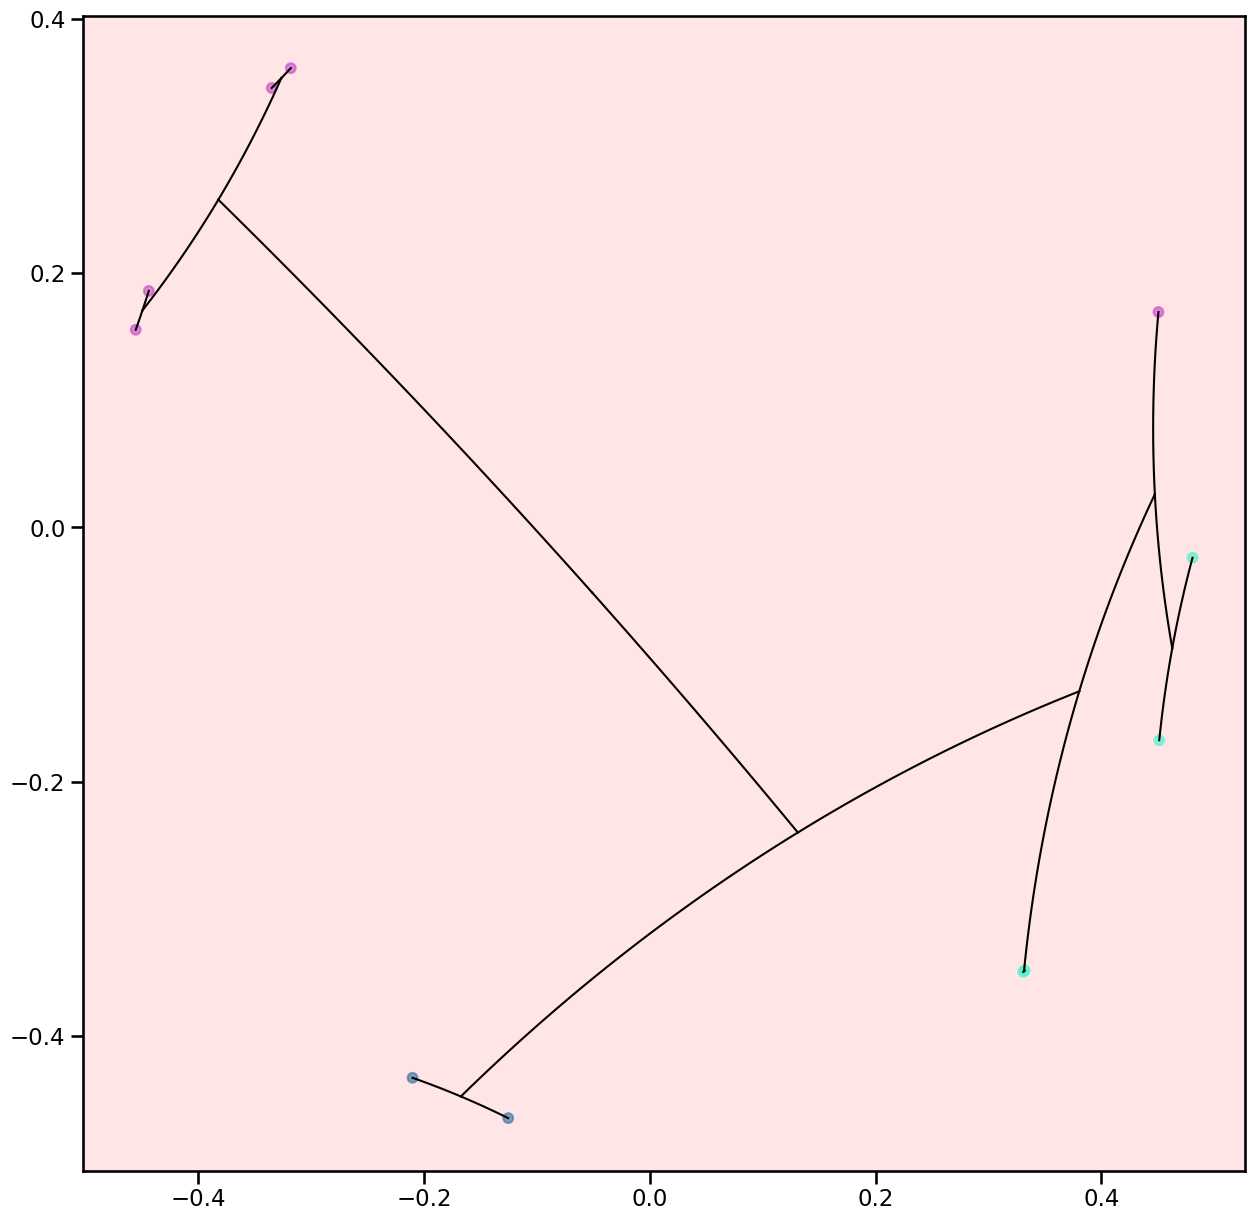

In [173]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [174]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'TRGV4 gdT': '#184e77', 'empty': '#fff', 'TRGV5/7 gdT': '#168aad', 'TRDV2/TRGV9 gdT': '#34a0a4'}


In [175]:
temp = rotate(nodes1,embeddings,3,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

45 255
	 Epoch 0 | average train loss1: 0.416287


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 0 | average train loss2: 0.368832
	 Epoch 1 | average train loss1: 0.428930


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:71: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:92: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss2: 0.369350
	 Epoch 2 | average train loss1: 0.418986
	 Epoch 2 | average train loss2: 0.368431


In [176]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

12 2
13 3
14 8
11 9
15 5
[20, 16, 2, 1, 3, 7, 19, 8, 10, 18, 9, 0, 17, 4, 5, 6]
66 210
	 Epoch 0 | average train loss1: 0.352897
	 Epoch 0 | average train loss2: 0.354138
	 Epoch 1 | average train loss1: 0.355347
	 Epoch 1 | average train loss2: 0.353779
	 Epoch 2 | average train loss1: 0.354766
	 Epoch 2 | average train loss2: 0.353181
{'TRGV4 gdT': '#184e77', 'empty': '#fff', 'TRGV5/7 gdT': '#168aad', 'TRDV2/TRGV9 gdT': '#34a0a4'}


In [177]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
np.save('./datas/t/1/'+"dataname_merge.npy",names)
np.save('./datas/t/1/'+"datalink_merge.npy",fathers)
np.save('./datas/t/1/'+"dataxy_merge.npy",[i.numpy() for i in xys]) 

In [178]:
data_path = './datas/t/2/' + 'datas.data'
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp2.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/t/2/datas.data length:7
Generating all pairs superset


In [179]:
train(model,dataloader,optimizer,similarities,20);


	 Epoch 0 | average train loss: 0.795439
Optimization finished.
	 Epoch 1 | average train loss: 0.785024
Optimization finished.
	 Epoch 2 | average train loss: 0.783690
Optimization finished.
	 Epoch 3 | average train loss: 0.778664
Optimization finished.
	 Epoch 4 | average train loss: 0.782753
Optimization finished.
	 Epoch 5 | average train loss: 0.787471
Optimization finished.
	 Epoch 6 | average train loss: 0.786475
Optimization finished.
	 Epoch 7 | average train loss: 0.786964
Optimization finished.
	 Epoch 8 | average train loss: 0.785678
Optimization finished.
	 Epoch 9 | average train loss: 0.785112
Optimization finished.
	 Epoch 10 | average train loss: 0.784169
Optimization finished.
	 Epoch 11 | average train loss: 0.782752
Optimization finished.
	 Epoch 12 | average train loss: 0.782809
Optimization finished.
	 Epoch 13 | average train loss: 0.785452
Optimization finished.
	 Epoch 14 | average train loss: 0.782407
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [180]:
torch.save(model.state_dict(),'./datas/t/2/' +'model3.pth');


In [181]:
params = torch.load(('./datas/t/2/'+'model3.pth'), map_location=torch.device('cpu'))
model.load_state_dict(params)

<All keys matched successfully>

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

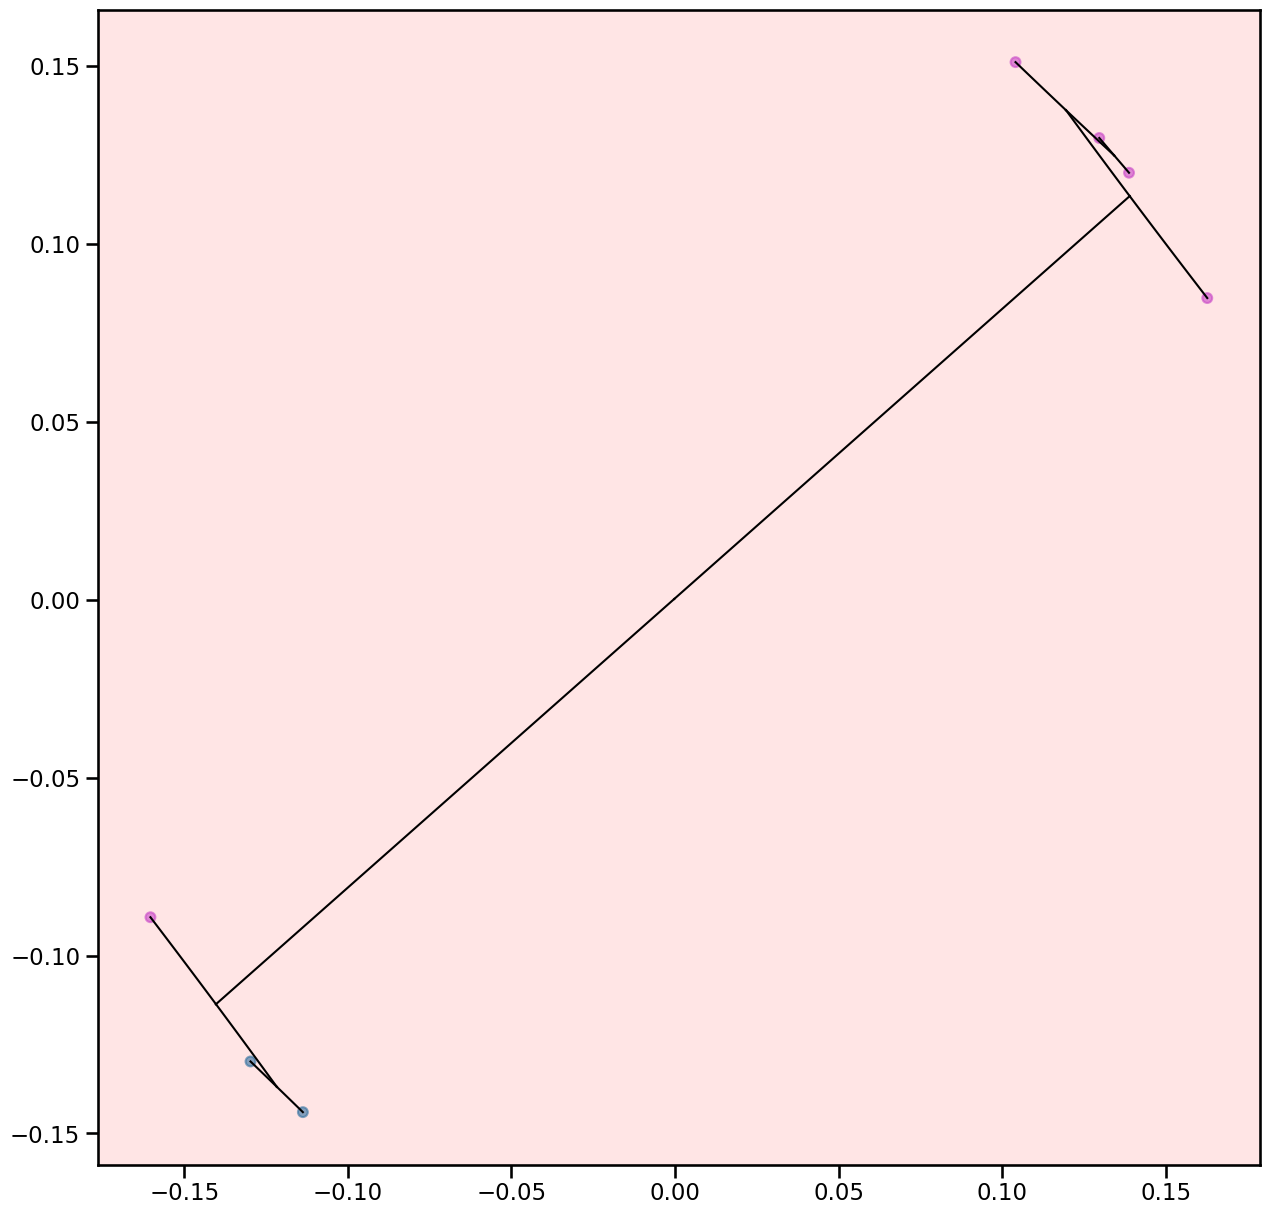

In [285]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)
colors = get_colors(meta_list2, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [286]:
meta_list2

['V4', 'V4', 'V4', 'V4', 'V4', 'V2/9', 'V2/9']

In [301]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'empty': '#fff', 'V4': '#1a759f', 'V2/9': '#168aad'}


In [302]:
add_meta(root,meta_list2,[])

t= show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c'])

{'empty': '#fff', 'V4': '#1a759f', 'V2/9': '#168aad'}


In [303]:
remove_meta(root);
t.fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

t.fig.show()

In [304]:
class show_tree:
    def __init__(self,root1,color=None):
        
        self.pos_x=[];
        self.pos_y=[];
        self.edges=[];
        self.label_hash = dict(); 
        self.labels = [];
        self.hover_text =[];
        self.values=[];
        self.cnt = 0;
        self.height=5;
        self.celltypes = [];
        self.fig = go.Figure();
        self.color = color;
        self.root1 = root1;
        self.run_graph();
        
    def cal_tree_pos(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltypes):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        if(len(now.name.split('_')) >1):
            celltypes.append(now.name.split('_')[1])
        else:
            celltypes.append('empty');
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value));
        if(num_son == 0):
            return;
        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt+=1;
            self.cal_tree_pos(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltypes);
            

    def run_graph(self):
        
        self.cal_tree_pos(self.root1,1,10,self.height,self.root1, self.pos_x,self.pos_y,self.edges,self.label_hash,self.labels,self.hover_text,self.values,self.celltypes);
        
        unique_categories = list(set(self.celltypes))
        if(self.color == None):
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
        elif(len(self.color)>= len(unique_categories)):
            category_colors = {cat: col  for cat,col in zip(unique_categories,self.color[:len(unique_categories)])}
        else:
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
            
        category_colors['empty'] = '#fff'
        print(category_colors)
        for i in self.edges:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash[p2];

            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x[index2];y2=self.pos_y[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=2,
                ),
                layer="below"
            )
        # Iterate over unique cell types
        for cell_type in unique_categories:
            indexs = [i for i in range(len(self.celltypes)) if self.celltypes[i] == cell_type]
            x_cell = [self.pos_x[i] for i in indexs]
            y_cell = [self.pos_y[i] for i in indexs]
            
            # Add scatter trace for the current cell type
            self.fig.add_trace(go.Scatter(
                x=x_cell,
                y=y_cell,
                mode='markers+text',
                name=cell_type,
                legendgroup=cell_type,
                marker=dict(
                    symbol='circle-dot',
                    size=30,
                    color=category_colors[cell_type]  # Set color based on cell type
                ),
                # text=[self.labels[i] for i in indexs],
                hoverinfo='text',
                hovertext=[self.labels[i] for i in indexs],
                # #textposition="top center",
                # textfont=dict(family='sans serif',
                # size=18,
                # color='#000000'
                # ),
                # opacity=0.8,
            ))

        # self.fig.add_trace(go.Scatter(x=self.pos_x,
        #                 y=self.pos_y,
        #                 mode='markers+text',
        #                 marker=dict(symbol='circle-dot',
        #                                 size=50,
        #                                 # color='#5B91D9',  
        #                                 # color=self.values,
        #                                 color=[category_colors[cat] for cat in self.celltypes],
        #                                 # colorscale="peach",
        #                                 # showscale=True,
        #                                 # line=dict(color='rgb(50,50,50)', width=1)
        #                                 ),
        #                 text=self.labels,
        #                 hoverinfo='text',
        #                 # hovertext=self.hover_text,
        #                 #textposition="top center",
        #                 textfont=dict(family='sans serif',
        #                 size=18,
        #                 color='#000000'
        #                     ),
        #                 opacity=0.8,
        #                 ))
        self.fig.update_layout(  
            xaxis= dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
            yaxis=dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
        width=1000, height=500
        )
        
        # self.fig.show()
    def show_fig(self):
        self.fig.show();
       

In [305]:
temp = rotate(nodes1,embeddings,3,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

10 52
	 Epoch 0 | average train loss1: 0.338440


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 0 | average train loss2: 0.298772
	 Epoch 1 | average train loss1: 0.337037


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:71: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:92: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss2: 0.297618
	 Epoch 2 | average train loss1: 0.337547
	 Epoch 2 | average train loss2: 0.297399


In [306]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

7 0
8 6
[12, 10, 2, 9, 4, 0, 1, 11, 3, 6, 5]
24 42
	 Epoch 0 | average train loss1: 0.303663
	 Epoch 0 | average train loss2: 0.290753
	 Epoch 1 | average train loss1: 0.301816
	 Epoch 1 | average train loss2: 0.290362
	 Epoch 2 | average train loss1: 0.302855
	 Epoch 2 | average train loss2: 0.290403
{'empty': '#fff', 'V4': '#1a759f', 'V2/9': '#168aad'}


In [307]:
nodes1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [308]:
hyp_dist(nodes1[3].hyper,nodes1[6].hyper),hyp_dist(nodes1[4].hyper,nodes1[0].hyper)

(tensor([0.5468], dtype=torch.float64), tensor([0.5170], dtype=torch.float64))

In [309]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,0.53,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

9 4
[12, 10, 2, 4, 0, 1, 11, 3, 6, 5]
30 30
	 Epoch 0 | average train loss1: 0.262817


	 Epoch 0 | average train loss2: 0.248299
	 Epoch 1 | average train loss1: 0.263979
	 Epoch 1 | average train loss2: 0.248559
	 Epoch 2 | average train loss1: 0.264850
	 Epoch 2 | average train loss2: 0.248532
{'empty': '#fff', 'V4': '#1a759f', 'V2/9': '#168aad'}


In [310]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
np.save('./datas/t/2/'+"dataname_merge.npy",names)
np.save('./datas/t/2/'+"datalink_merge.npy",fathers)
np.save('./datas/t/2/'+"dataxy_merge.npy",[i.numpy() for i in xys]) 

In [311]:
nodes1 = build_hyper_tree_from_folder('./datas/t/1/',True)
nodes2 = build_hyper_tree_from_folder('./datas/t/2/',True)
nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])

        

rate,anslist,ans = run_alignment(nodes1,nodes2,'./datas/t/1/','./datas/t/2/',meta_list1,meta_list2);


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:799: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

The mininum cost for alignment is 11.224242424242425
The alignment edges list is [('20', '12'), ('19', '11'), ('4_V4', '3_V4'), ('8_V2/9', '6_V2/9'), ('10_V2/9', '5_V2/9'), ('16', '10'), ('2_V4', '0_V4'), ('1_V4', '1_V4'), ('3_V4', '2_V4')]
average cost for one node:0.4317016317016317

correct alignment rate:1.0


In [312]:
ans

[('20', '12'),
 ('19', '11'),
 ('4_V4', '3_V4'),
 ('8_V2/9', '6_V2/9'),
 ('10_V2/9', '5_V2/9'),
 ('16', '10'),
 ('2_V4', '0_V4'),
 ('1_V4', '1_V4'),
 ('3_V4', '2_V4')]

In [313]:
meta_list1=['V5/7',
 'V4',
 'V4',
 'V4',
 'V4',
'V5/7', 'V5/7',
 'V4',
 'V2/9',
'V5/7',
'V2/9',]

In [314]:
meta_list2=[ 'V4',
 'V4',
 'V4',
 'V4',
 'V4',
  'V2/9',
 'V2/9',

]

In [315]:
meta_list1

['V5/7', 'V4', 'V4', 'V4', 'V4', 'V5/7', 'V5/7', 'V4', 'V2/9', 'V5/7', 'V2/9']

In [316]:
meta_list2

['V4', 'V4', 'V4', 'V4', 'V4', 'V2/9', 'V2/9']

In [317]:
t=show_graph(ans,nodes1[0],nodes2[0],color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c'])
t.fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

t.fig.show()

{'empty': '#fff', 'V5/7': '#1a759f', 'V4': '#168aad', 'V2/9': '#34a0a4'}


In [274]:
nodes2

[12, 10, 2_V4, 9, 4_V4, 0_V4, 1_V4, 11, 3_V4, 6_V2/9, 5_V2/9]

In [277]:
cosine_similarity(np.array(adata[adata.obs[adata.obs['leiden']=='1'].index].to_df().mean()).reshape(1,-1),np.array(g).reshape(1,-1))

array([[0.9326125]], dtype=float32)

In [282]:
cosine_similarity(np.array(adata[adata.obs[adata.obs['leiden']=='0'].index].to_df().mean()).reshape(1,-1),np.array(g).reshape(1,-1))

array([[0.7312241]], dtype=float32)

In [281]:
a1 = adata[adata.obs[adata.obs['leiden']=='1'].index].to_df().mean()
a2 = adata[adata.obs[adata.obs['leiden']=='17'].index].to_df().mean()

a=hyp_dist(nodes1[3].hyper,nodes1[4].hyper).numpy()
b= hyp_dist(nodes1[3].hyper,nodes1[5].hyper).numpy()
r = a1*a/(a+b) + a2*b/(a+b)
g = adata[adata.obs[adata.obs['leiden']=='7'].index].to_df().mean()
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(np.array(r).reshape(1,-1),np.array(g).reshape(1,-1))

array([[0.9615905556]])

In [272]:
adata.obs[['annotation','leiden']].groupby('leiden').describe()

annotation                             
            count unique              top freq
leiden                                        
0             197      4      TRGV5/7 gdT  185
1             163      4        TRGV4 gdT   96
2             156      5        TRGV2 gdT   73
3             153      5        TRGV2 gdT  104
4             149      4        TRGV4 gdT  111
5             145      3        TRGV2 gdT   73
6             141      4              gdT  130
7             141      3        TRGV4 gdT   83
8             135      2              gdT  133
9             129      4              gdT  125
10            122      3              gdT  119
11            122      3        TRGV2 gdT   72
12            121      2              gdT  119
13            121      4        TRGV4 gdT   61
14            119      2      TRGV5/7 gdT  117
15            117      3        TRGV2 gdT   65
16            116      4      TRGV5/7 gdT  112
17            111      4        TRGV4 gdT   79
18            109      4              gdT   97
19            103      3              gdT   92
20            101      4              gdT   93
21            101      2              gdT   98
22             98      2              gdT   97
23             97      3        TRGV2 gdT   80
24             96      3  TRDV2/TRGV9 gdT   89
25             88      2              gdT   86
26             86      3              gdT   84
27             86      5              gdT   46
28             85      3              gdT   81
29             84      2              gdT   83
30             83      2              gdT   80
31             82      1              gdT   82
32             81      4              gdT   74
33             76      1              gdT   76
34             75      4        TRGV2 gdT   31
35             74      3        TRGV2 gdT   36
36             63      3      TRGV5/7 gdT   58
37             50      1  TRDV2/TRGV9 gdT   50
38             25      1              gdT   25

In [261]:
.show_fig()

{'empty': '#fff', 'V5/7': '#1a759f', 'V4': '#168aad', 'V2/9': '#34a0a4'}


In [260]:
class show_graph:
    def __init__(self,ans,root1,root2,color=None):
        self.ans = ans;
        
        self.pos_x=[];
        self.pos_y=[];
        self.edges=[];
        self.label_hash = dict(); 
        self.labels = [];
        self.hover_text =[];
        self.values=[];
        self.cnt = 0;
        self.celltypes1=[]
        self.celltypes2=[]

        self.color = color;
        self.pos_x_2=[];
        self.pos_y_2=[];
        self.edges_2=[];
        self.label_hash_2 = dict(); 
        self.labels_2 = []
        self.hover_text_2 = []
        self.values_2=[];
        self.cnt2 = 0;
        self.fig = go.Figure();
        
        self.root1 = root1;
        self.root2 = root2;
        self.height = 5;
        self.run_graph();
        
    def cal_tree_pos(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        if(len(now.name.split('_')) >1):
            celltype.append(now.name.split('_')[1])
        else:
            celltype.append('empty');
        
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value));
        if(num_son == 0):
            return;
        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt+=1;
            self.cal_tree_pos(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype);
            
    def cal_tree_pos2(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt2;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        if(len(now.name.split('_')) >1):
            celltype.append(now.name.split('_')[1])
        else:
            celltype.append('empty');
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value))
        if(num_son == 0):
            return;

        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt2+=1;
            self.cal_tree_pos2(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values,celltype);
            
    def run_graph(self):
        
        self.cal_tree_pos(self.root1,1,20,self.height,self.root1, self.pos_x,self.pos_y,self.edges,self.label_hash,self.labels,self.hover_text,self.values,self.celltypes1);
        
        self.cal_tree_pos2(self.root2,18,37,self.height-1.5,self.root2, self.pos_x_2,self.pos_y_2,self.edges_2,self.label_hash_2,self.labels_2,self.hover_text_2,self.values_2,self.celltypes2);
        unique_categories = list(set(self.celltypes1+self.celltypes2))
        if(self.color == None):
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
        elif(len(self.color)>= len(unique_categories)):
            category_colors = {cat: col  for cat,col in zip(unique_categories,self.color[:len(unique_categories)])}
        else:
            category_colors = {cat: f'#{random.randint(0, 0xFFFFFF):06x}' for cat in unique_categories}
            
        category_colors['empty'] = '#fff'        
        print(category_colors)
        
        for i in self.edges:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash[p2];

            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x[index2];y2=self.pos_y[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=4,
                ),
                layer="below"
            )

        for i in self.edges_2:
            p1,p2 = i;

            index1=self.label_hash_2[p1];
            index2=self.label_hash_2[p2];

            x1=self.pos_x_2[index1];y1=self.pos_y_2[index1];
            x2=self.pos_x_2[index2];y2=self.pos_y_2[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=4,
                ),
                layer="below"
            )
            
        for i in self.ans:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash_2[p2];
            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x_2[index2];y2=self.pos_y_2[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#6175c1",
                    width=4,
                ),
                layer="below"
            )
            self.hover_text[index1]="connect {}".format(p2);
            self.hover_text_2[index2]="connect {}".format(p1);
          
        for cell_type in unique_categories:
            indexs = [i for i in range(len(self.celltypes1)) if self.celltypes1[i] == cell_type]
            x_cell1 = [self.pos_x[i] for i in indexs]
            y_cell1 = [self.pos_y[i] for i in indexs]
            label1 = [self.hover_text[i] for i in indexs]
            name1 = [self.labels[i] for i in indexs]
            indexs = [i for i in range(len(self.celltypes2)) if self.celltypes2[i] == cell_type]
            x_cell2 = [self.pos_x_2[i] for i in indexs]
            y_cell2 = [self.pos_y_2[i] for i in indexs]
            label2 = [self.hover_text_2[i] for i in indexs]
            name2 = [self.labels_2[i] for i in indexs]
            x_cell = x_cell1+x_cell2
            y_cell = y_cell1 + y_cell2
            label = label1+label2
            # Add scatter trace for the current cell type
            self.fig.add_trace(go.Scatter(
                x=x_cell,
                y=y_cell,
                mode='markers+text',
                name=cell_type,
                legendgroup=cell_type,
                marker=dict(
                    symbol='circle-dot',
                    size=30,
                    color=category_colors[cell_type]  # Set color based on cell type
                ),
                hoverinfo='text',
                hovertext=label,
                text = name1+name2,
                textfont=dict(family='sans serif',
                size=15,
                color='#000000'
                    ),
            ))
        # pos_x_final = self.pos_x+self.pos_x_2
        # pos_y_final = self.pos_y+self.pos_y_2
        # values_final = self.values + self.values_2
        # labels_final = self.labels + self.labels_2
        # self.fig.add_trace(go.Scatter(x=pos_x_final,
        #                 y=pos_y_final,
        #                 mode='markers+text',
        #                 marker=dict(symbol='circle-dot',
        #                                 size=50,
        #                                 color=values_final,
        #                                 colorscale="peach",
        #                                 ),
        #                 text=labels_final,
        #                 hoverinfo='text',
        #                 hovertext=self.hover_text+self.hover_text_2,
        #                 textfont=dict(family='sans serif',
        #                 size=18,
        #                 color='#000000'
        #                     ),
        #                 opacity=0.8,
        #                 ))
        
        self.fig.update_layout(  
            xaxis= dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
            yaxis=dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
        width=1000, height=500)
        
        # self.fig.show()
    def show_fig(self):
        self.fig.show();
    def save_fig(self,path):
        self.fig.write_image(path)


In [213]:
class show_graph:
    def __init__(self,ans,root1,root2):
        self.ans = ans;
        
        self.pos_x=[];
        self.pos_y=[];
        self.edges=[];
        self.label_hash = dict(); 
        self.labels = [];
        self.hover_text =[];
        self.values=[];
        self.cnt = 0;
        
        self.pos_x_2=[];
        self.pos_y_2=[];
        self.edges_2=[];
        self.label_hash_2 = dict(); 
        self.labels_2 = []
        self.hover_text_2 = []
        self.values_2=[];
        self.cnt2 = 0;
        self.fig = go.Figure();
        
        self.root1 = root1;
        self.root2 = root2;
        self.height = 5;
        self.run_graph();
        
    def cal_tree_pos(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value));
        if(num_son == 0):
            return;
        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt+=1;
            self.cal_tree_pos(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values);
            
    def cal_tree_pos2(self,now,l,r,h,f,pos_x,pos_y,edges,label_hash,labels,hover_text,values):
        mid = (l+r)/2
        pos_x.append(mid);
        pos_y.append(h)
        label_hash[now.name]=self.cnt2;
        num_son = len(now.son);
        labels.append("{}".format(now.name));
        edges.append((f.name,now.name));
        hover_text.append("connect Empty");
        values.append(np.linalg.norm(now.value))
        if(num_son == 0):
            return;

        length = (r-l)/num_son;
        for i in range(num_son):
            self.cnt2+=1;
            self.cal_tree_pos2(now.son[i],l+i*length,l+(i+1)*length,h-1.5,now,pos_x,pos_y,edges,label_hash,labels,hover_text,values);
            
    def run_graph(self):
        
        self.cal_tree_pos(self.root1,1,20,self.height,self.root1, self.pos_x,self.pos_y,self.edges,self.label_hash,self.labels,self.hover_text,self.values);
        
        self.cal_tree_pos2(self.root2,25,39,self.height-1.5,self.root2, self.pos_x_2,self.pos_y_2,self.edges_2,self.label_hash_2,self.labels_2,self.hover_text_2,self.values_2);
        
        for i in self.edges:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash[p2];

            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x[index2];y2=self.pos_y[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=4,
                ),
                layer="below"
            )

        for i in self.edges_2:
            p1,p2 = i;

            index1=self.label_hash_2[p1];
            index2=self.label_hash_2[p2];

            x1=self.pos_x_2[index1];y1=self.pos_y_2[index1];
            x2=self.pos_x_2[index2];y2=self.pos_y_2[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#333",
                    width=4,
                ),
                layer="below"
            )
            
        for i in self.ans:
            p1,p2 = i;
            index1=self.label_hash[p1];
            index2=self.label_hash_2[p2];
            x1=self.pos_x[index1];y1=self.pos_y[index1];
            x2=self.pos_x_2[index2];y2=self.pos_y_2[index2];
            self.fig.add_shape(
                type="line",
                x0=x1, y0=y1, x1=x2, y1=y2,
                line=dict(
                    color="#6175c1",
                    width=4,
                ),
                layer="below"
            )
            self.hover_text[index1]="connect {}".format(p2);
            self.hover_text_2[index2]="connect {}".format(p1);
            
        pos_x_final = self.pos_x+self.pos_x_2
        pos_y_final = self.pos_y+self.pos_y_2
        values_final = self.values + self.values_2
        labels_final = self.labels + self.labels_2
        self.fig.add_trace(go.Scatter(x=pos_x_final,
                        y=pos_y_final,
                        mode='markers+text',
                        marker=dict(symbol='circle-dot',
                                        size=44,
                                        # color='#5B91D9',  
                                        color=values_final,
                                        colorscale="peach",
                                        # line=dict(color='rgb(50,50,50)', width=1)
                                        ),
                        text=labels_final,
                        hoverinfo='text',
                        hovertext=self.hover_text+self.hover_text_2,
                        #textposition="top center",
                        textfont=dict(family='sans serif',
                        size=18,
                        color='#000000'
                            ),
                        opacity=0.8,
                        ))

        self.fig.update_layout(  
            xaxis= dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
            yaxis=dict(showline=False, # hide axis line, grid, ticklabels and  title
                    zeroline=False,
                    showgrid=False,
                    showticklabels=False,
                    ),
        width=1000, height=500)
        
        # self.fig.show()
    def show_fig(self):
        self.fig.show();
    def save_fig(self,path):
        self.fig.write_image(path)
